# Correlation Heatmap

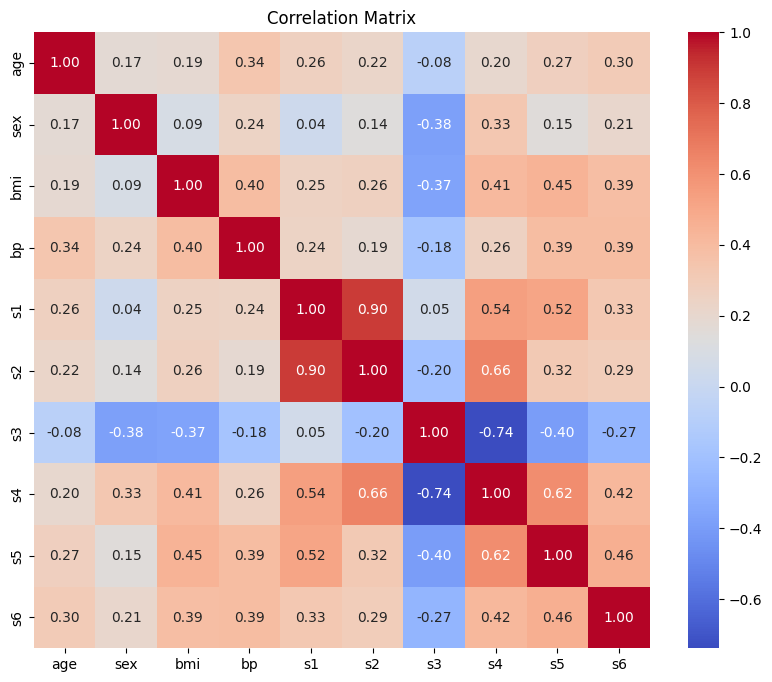

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Create a Pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['disease progression'] = y

# Calculate the correlation matrix
correlation_matrix = df[feature_names].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Multivariable Linear Regression



Evaluating combinations of 2 features:

Features: ('bmi', 'bp') | R²: 0.3960 | RMSE: 59.85
Features: ('bmi', 's5') | R²: 0.4595 | RMSE: 56.61


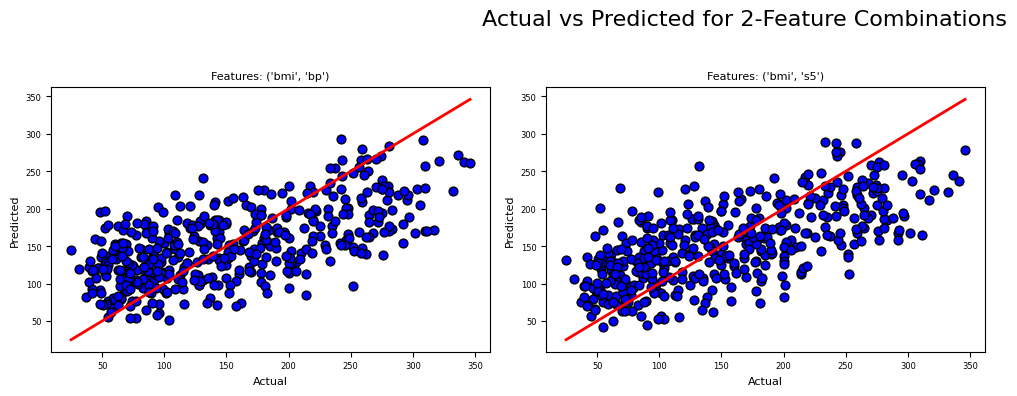


Evaluating combinations of 3 features:

Features: ('age', 'bmi', 'bp') | R²: 0.3962 | RMSE: 59.84
Features: ('age', 'bmi', 's5') | R²: 0.4596 | RMSE: 56.61
Features: ('sex', 'bmi', 'bp') | R²: 0.3998 | RMSE: 59.66
Features: ('sex', 'bmi', 's4') | R²: 0.3929 | RMSE: 60.00
Features: ('sex', 'bmi', 's5') | R²: 0.4621 | RMSE: 56.48
Features: ('bmi', 'bp', 's1') | R²: 0.3970 | RMSE: 59.80
Features: ('bmi', 'bp', 's2') | R²: 0.3960 | RMSE: 59.85
Features: ('bmi', 'bp', 's3') | R²: 0.4300 | RMSE: 58.14
Features: ('bmi', 'bp', 's4') | R²: 0.4290 | RMSE: 58.19
Features: ('bmi', 'bp', 's5') | R²: 0.4801 | RMSE: 55.53
Features: ('bmi', 'bp', 's6') | R²: 0.4077 | RMSE: 59.26
Features: ('bmi', 's1', 's3') | R²: 0.3912 | RMSE: 60.09
Features: ('bmi', 's1', 's5') | R²: 0.4700 | RMSE: 56.06
Features: ('bmi', 's2', 's4') | R²: 0.4057 | RMSE: 59.37
Features: ('bmi', 's2', 's5') | R²: 0.4630 | RMSE: 56.43
Features: ('bmi', 's3', 's4') | R²: 0.3913 | RMSE: 60.08
Features: ('bmi', 's3', 's5') | R²: 0.4698

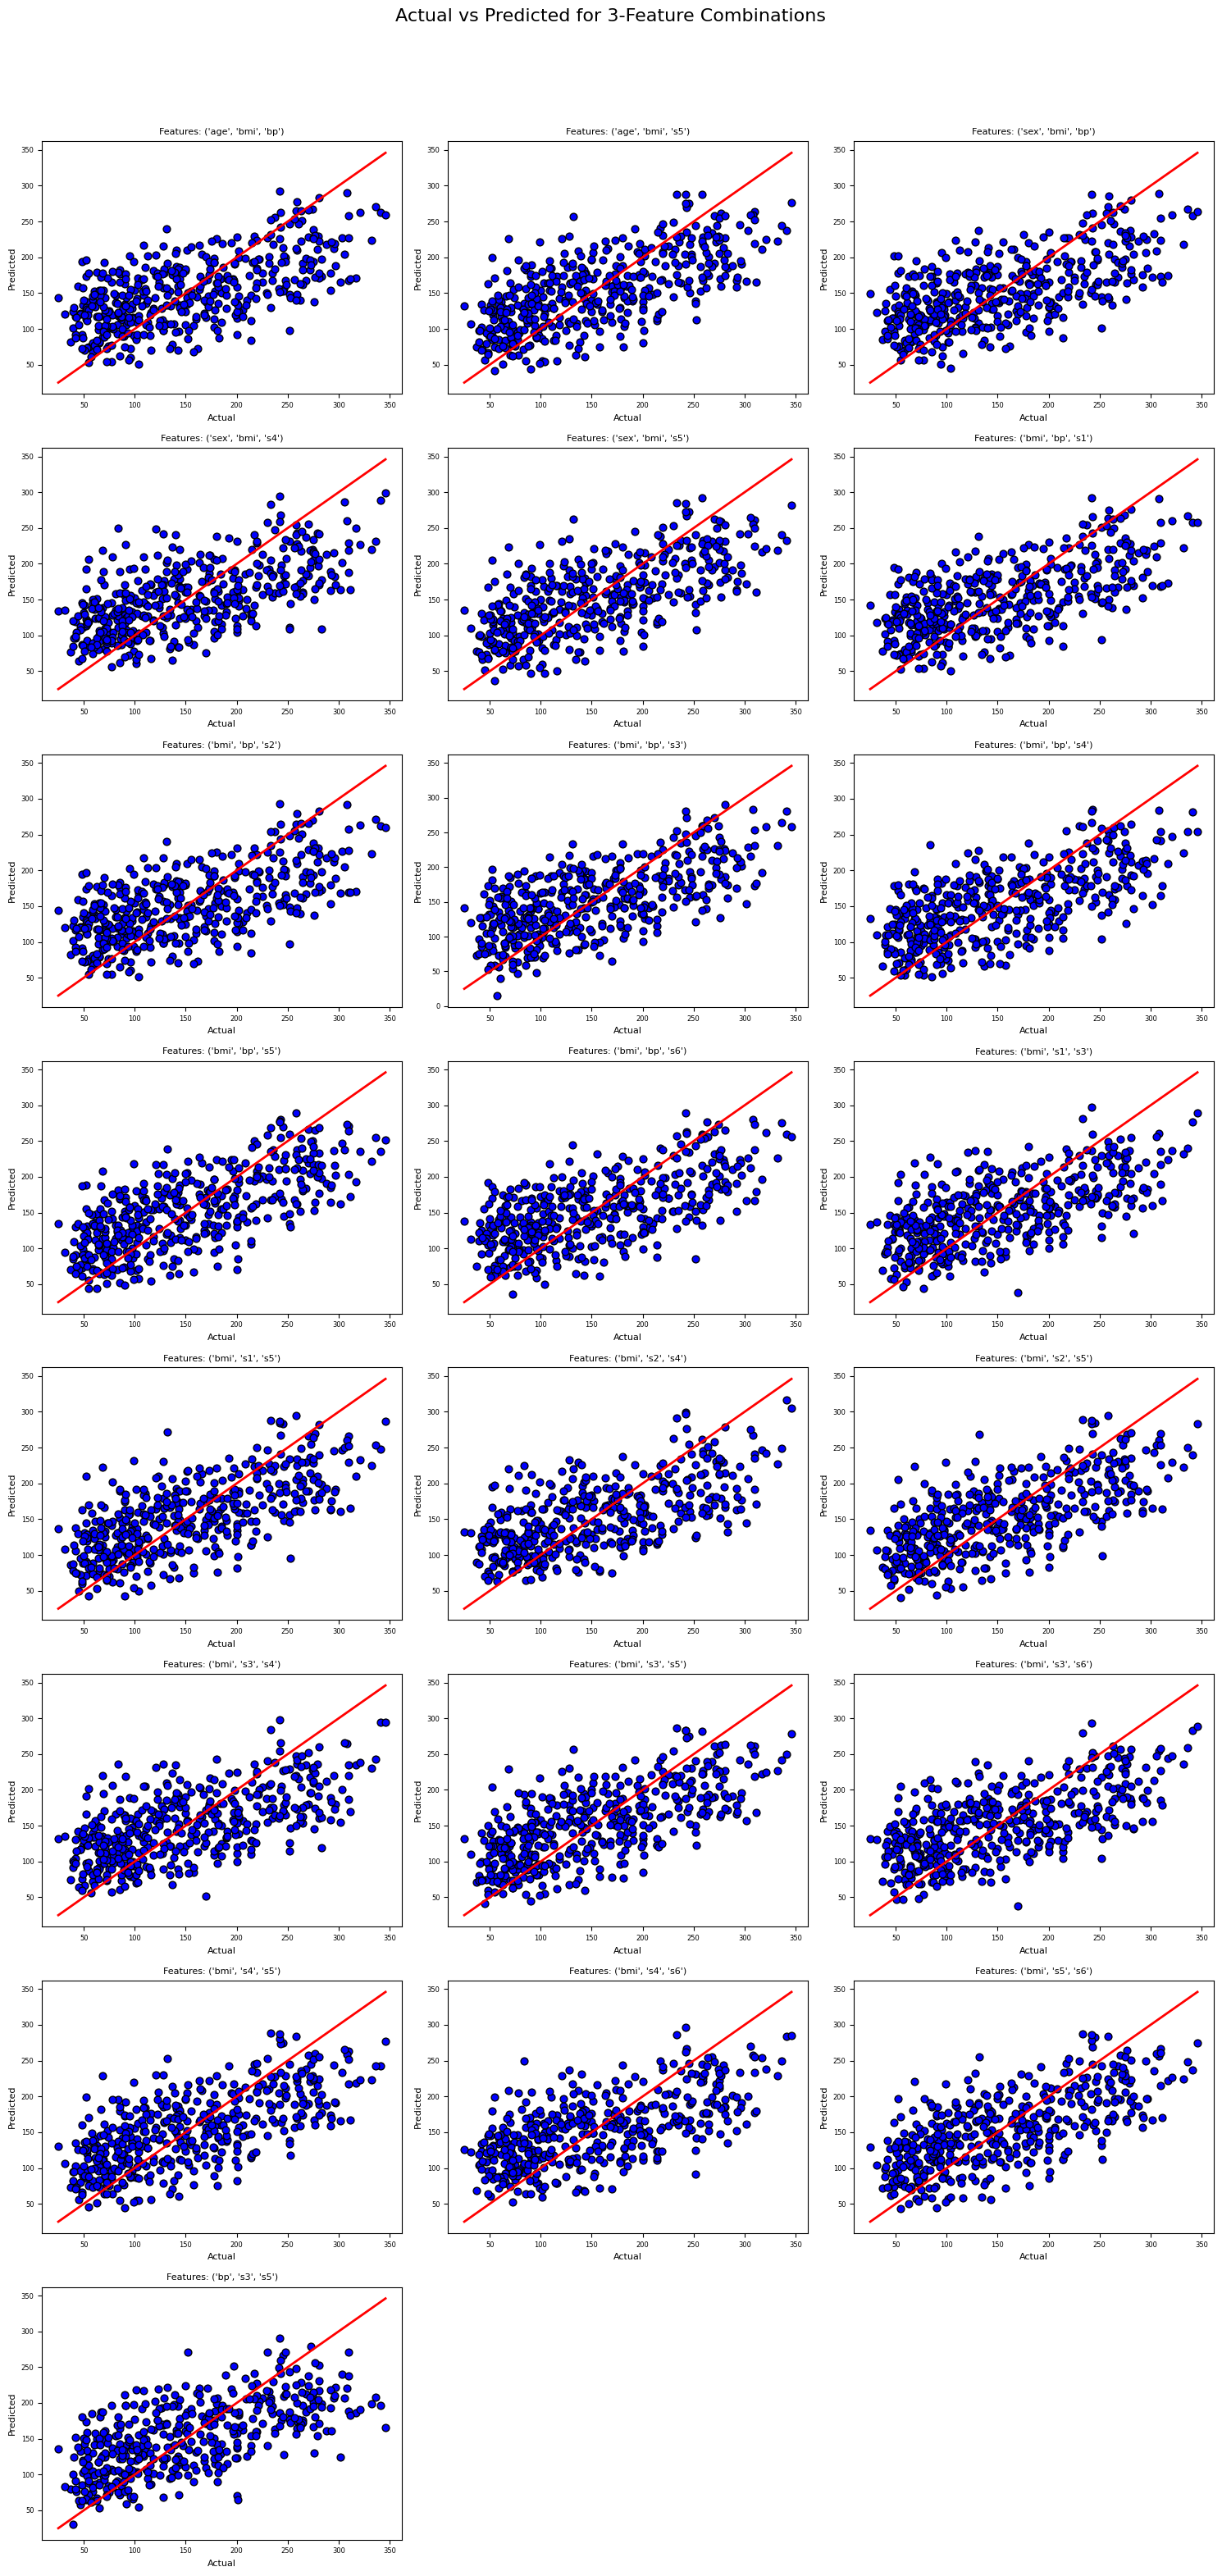

In [90]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Create a Pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['disease progression'] = y

# Initialize linear regression model
linreg = LinearRegression()

# Alpha parameter for regularization strength
lasso_reg = Lasso(alpha= 0.2)  
ridge_reg = Ridge(alpha = 0.05)

# Calculate R² and MSE
def evaluate_model(ax, features, model):
    selected_columns = df[list(features)]  # Select the feature combination
    model.fit(selected_columns, df['disease progression'])
    
    # Predict R² and MSE
    y_pred = model.predict(selected_columns)
    r2 = r2_score(df['disease progression'], y_pred)
    mse = mean_squared_error(df['disease progression'], y_pred)


    if r2 <= 0.39:
        return None  # Skip plot if not strong enough
    
    # Actual vs predicted disease progression
    ax.scatter(df['disease progression'], y_pred, color='blue', edgecolor='k', s=40)
    ax.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)  # Line of perfect prediction
    ax.set_title(f'Features: {features}', fontsize=8)
    ax.set_xlabel('Actual', fontsize=8)
    ax.set_ylabel('Predicted', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)

    print(f"Features: {features} | R²: {r2:.4f} | RMSE: {math.sqrt(mse):.2f}")
    return r2

def plot_model(model):
    for k in range(2, 4): # pairs to groups of four
        print(f"\nEvaluating combinations of {k} features:\n")

        feature_combinations = list(itertools.combinations(feature_names, k))
        valid_combinations = []

        for combination in feature_combinations:
            selected_columns = df[list(combination)]
            model.fit(selected_columns, df['disease progression'])
            y_pred = model.predict(selected_columns)
            r2 = r2_score(df['disease progression'], y_pred)
        
            if r2 > 0.39:  # Only keep if strong enough
                valid_combinations.append(combination)

        num_valid_combinations = len(valid_combinations)
        num_rows = (num_valid_combinations + 2) // 3 
        num_cols = 3
    
        # Subplots
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))  # Adjust size as needed
        fig.suptitle(f'Actual vs Predicted for {k}-Feature Combinations', fontsize=16)
    
        axes = axes.flatten()

        for i, combination in enumerate(valid_combinations):
            r2  = evaluate_model(axes[i], combination, model)
            # If the model is skipped due to low R², remove the axis from the plot
            if r2 is None:
                fig.delaxes(axes[i])

    
        # Get rid of empty subplots if R^2 wasn't high enough
        for j in range(i+1, num_rows * num_cols):
            fig.delaxes(axes[j])
    
            plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to fit suptitle
        plt.show()
        
plot_model(linreg)



# Ridge Regression



Evaluating combinations of 2 features:

Features: ('bmi', 'bp') | R²: 0.3954 | RMSE: 59.87
Features: ('bmi', 's5') | R²: 0.4590 | RMSE: 56.64


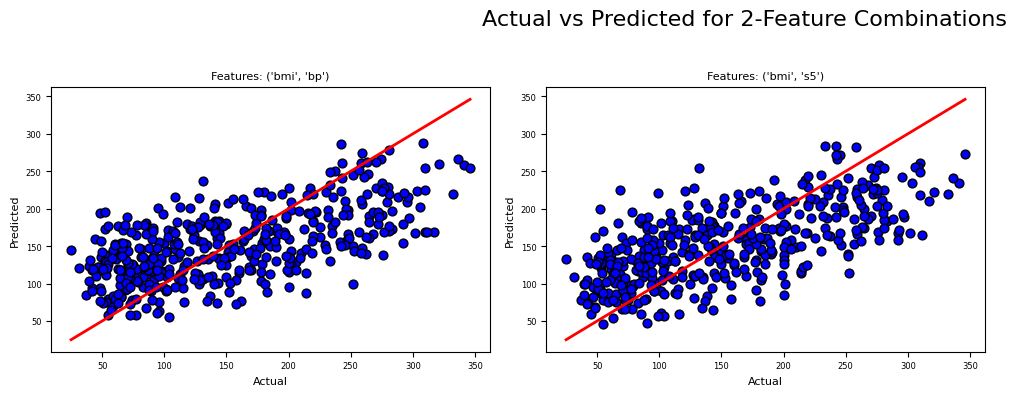


Evaluating combinations of 3 features:

Features: ('age', 'bmi', 'bp') | R²: 0.3957 | RMSE: 59.86
Features: ('age', 'bmi', 's5') | R²: 0.4590 | RMSE: 56.64
Features: ('sex', 'bmi', 'bp') | R²: 0.3992 | RMSE: 59.69
Features: ('sex', 'bmi', 's4') | R²: 0.3923 | RMSE: 60.03
Features: ('sex', 'bmi', 's5') | R²: 0.4616 | RMSE: 56.51
Features: ('bmi', 'bp', 's1') | R²: 0.3964 | RMSE: 59.83
Features: ('bmi', 'bp', 's2') | R²: 0.3954 | RMSE: 59.88
Features: ('bmi', 'bp', 's3') | R²: 0.4295 | RMSE: 58.16
Features: ('bmi', 'bp', 's4') | R²: 0.4286 | RMSE: 58.21
Features: ('bmi', 'bp', 's5') | R²: 0.4797 | RMSE: 55.55
Features: ('bmi', 'bp', 's6') | R²: 0.4072 | RMSE: 59.29
Features: ('bmi', 's1', 's3') | R²: 0.3906 | RMSE: 60.11
Features: ('bmi', 's1', 's5') | R²: 0.4691 | RMSE: 56.11
Features: ('bmi', 's2', 's4') | R²: 0.4045 | RMSE: 59.42
Features: ('bmi', 's2', 's5') | R²: 0.4624 | RMSE: 56.46
Features: ('bmi', 's3', 's4') | R²: 0.3908 | RMSE: 60.10
Features: ('bmi', 's3', 's5') | R²: 0.4693

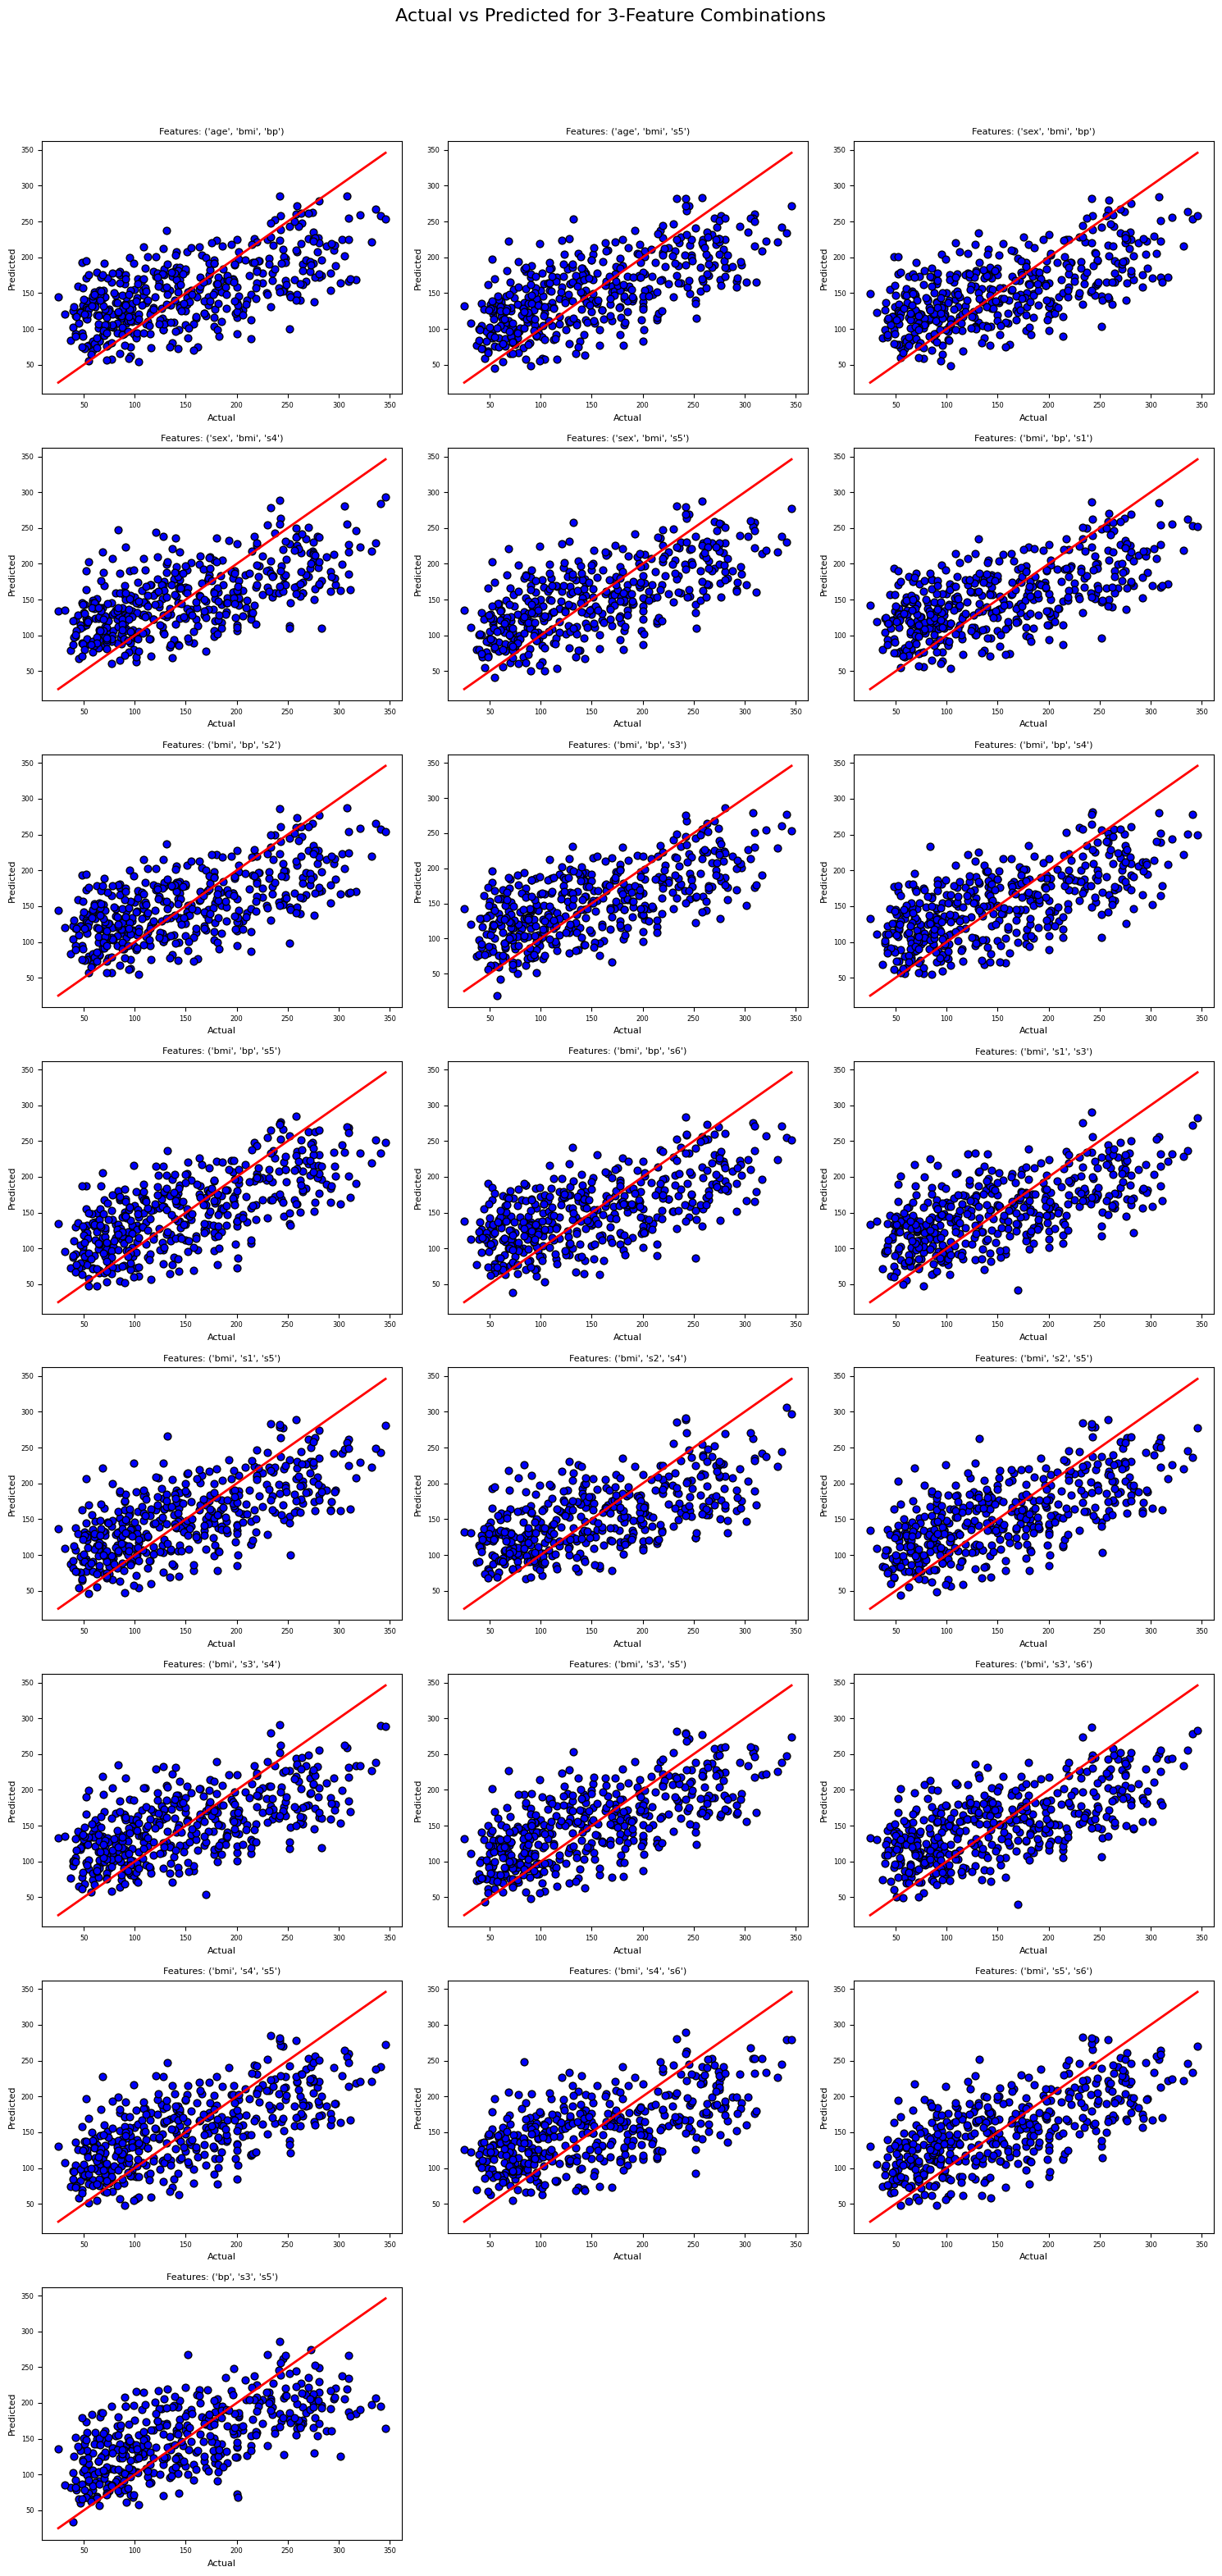

In [91]:
plot_model(ridge_reg)

# Multivariate Lasso Regression


Evaluating combinations of 2 features:

Features: ('bmi', 'bp') | R²: 0.3917 | RMSE: 60.06
Features: ('bmi', 's5') | R²: 0.4554 | RMSE: 56.83


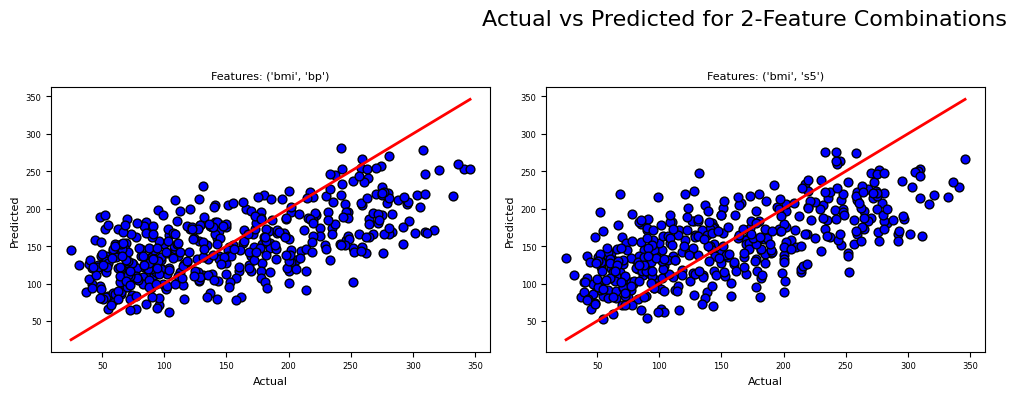


Evaluating combinations of 3 features:

Features: ('age', 'bmi', 'bp') | R²: 0.3917 | RMSE: 60.06
Features: ('age', 'bmi', 's5') | R²: 0.4554 | RMSE: 56.83
Features: ('sex', 'bmi', 'bp') | R²: 0.3917 | RMSE: 60.06
Features: ('sex', 'bmi', 's5') | R²: 0.4554 | RMSE: 56.83
Features: ('bmi', 'bp', 's1') | R²: 0.3917 | RMSE: 60.06
Features: ('bmi', 'bp', 's2') | R²: 0.3917 | RMSE: 60.06
Features: ('bmi', 'bp', 's3') | R²: 0.4244 | RMSE: 58.42
Features: ('bmi', 'bp', 's4') | R²: 0.4238 | RMSE: 58.45
Features: ('bmi', 'bp', 's5') | R²: 0.4752 | RMSE: 55.79
Features: ('bmi', 'bp', 's6') | R²: 0.4027 | RMSE: 59.51
Features: ('bmi', 's1', 's5') | R²: 0.4564 | RMSE: 56.78
Features: ('bmi', 's2', 's5') | R²: 0.4554 | RMSE: 56.83
Features: ('bmi', 's3', 's5') | R²: 0.4648 | RMSE: 56.34
Features: ('bmi', 's3', 's6') | R²: 0.3955 | RMSE: 59.87
Features: ('bmi', 's4', 's5') | R²: 0.4559 | RMSE: 56.80
Features: ('bmi', 's4', 's6') | R²: 0.3936 | RMSE: 59.96
Features: ('bmi', 's5', 's6') | R²: 0.4573 

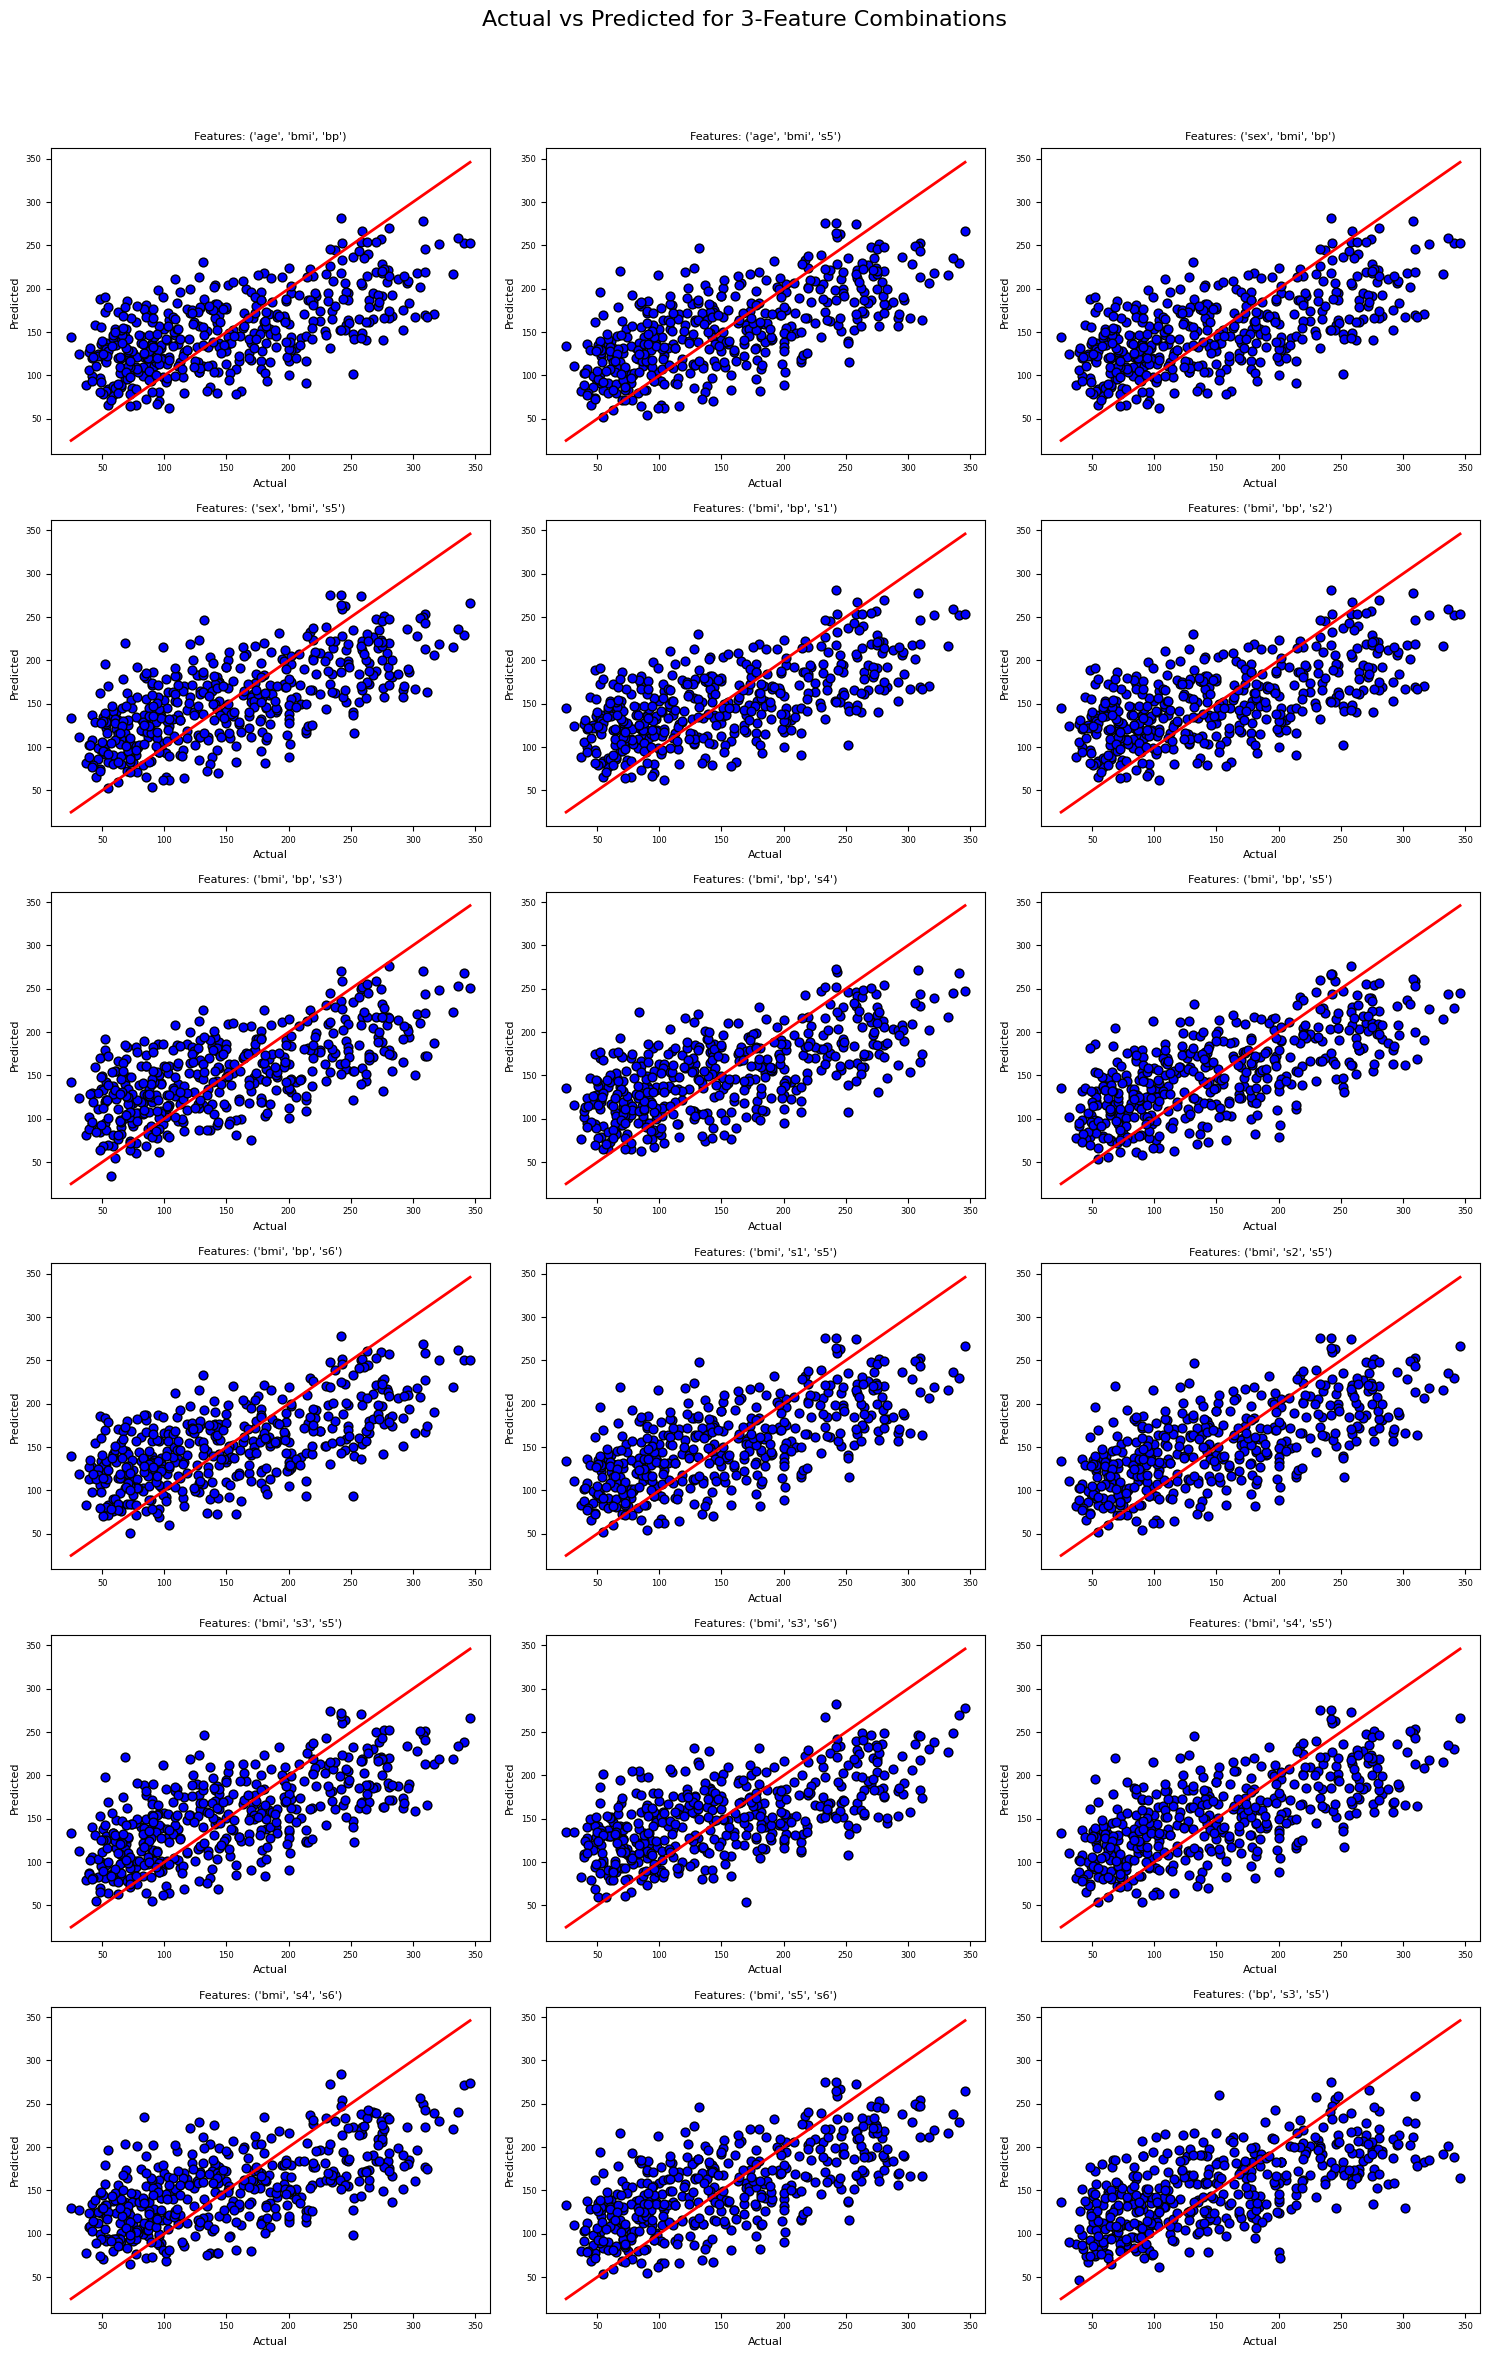

In [92]:
plot_model(lasso_reg)